# **Описание проекта: промышленность**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

## **Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

## **Описание данных**
Данные состоят из файлов, полученных из разных источников:

`data_arc_new.csv` — данные об электродах;

`data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);

`data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);

`data_gas_new.csv` — данные о продувке сплава газом;

`data_temp_new.csv` — результаты измерения температуры;

`data_wire_new.csv` — данные о проволочных материалах (объём);

`data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## **Уточнения по проекту**

Фиксируются следующие договоренности:
- random_state - 26923
- предсказываем последнюю температуру
- test_size - 25 %
- выборку делим на две части, т.к. используем кросс-валидацию (можно
использовать алгоритмы автоматического поиска параметров
Gridsearchcv и RandomizedSearchCV,)
- используем минимум две модели (простую, типа лин рег или дерева
решений и сложную модель градиентного бустинга, любую на выбор),
при использовании простой модели не забываем, что она требует
большей предобработки данных, проверка на мультиколлинеарность,
масштабирование признаков
- блокнот должен отрабатывать за 30 - 60 мин(пожелание)

В проекте есть две аномалии, которые необходимо удалить:
- сильно отрицательная мощность
- температуры менее 1500 градусов,

Все остальные данные, которые могут показаться
выбросами, можем удалить только из тренировочных данных, тест не
затрагивается.

Для модели можем генерировать любые признаки, кроме содержащих
последнюю и промежуточные температуры или сгенерированные из
последней и промежуточной температуры, начальную температуру в
качестве признака можем брать, т.к. она всегда известна.

## Отчет

### Какие пункты плана были выполнены, а какие — нет. Почему?

После исследовательского анализа данных план выглядел следующим образом.

**План исследования:**
1. отделение целевого признака `end_temperature` от остальных признаков
2. замена NA-значений заглушками (0)
3. разделение на тренировочную и тестовую выборки
4. стандартизация признаков
5. Подбор лучшей ML-модели, ключевая метрика - MAE. Предлагается рассмотреть несколько вариантов дерева решений и catboost
6. Выбор лучшей модели с помощью кросс-валидации
7. Тестирование лучшей модели
8. Отчет о проведенном исследовании

В процессе также была проделана **генерация дополнительных признаков**: 
- работы, проделанной во время нагревания
- соотношения объема газа к числу нагреваний
- общего объема рассыпчатых и проволочных добавок

Кроме того, были удалены сильно коррелирующие признаки.

### Какие трудности возникли и как их удалось преодолеть?

- В данных были аномальные температуры менее 1500 градусов, пришлось удалять такие наблюдения целиком. 
- Удалены наблюдения с сильно отрицательной реактивной мощностью нагревания
- После объединения датафреймов и генерации признаков выявлены сильно коррелирующие друг с другом признаки, от которых пришлось избавиться
- Обучение моделей заняло продолжительное время

### Какие ключевые шаги в решении задачи можно выделить?

- Исследовательский анализ данных
- Работа с пропусками и аномалиями
- Объединение датафреймов
- Проверка корреляции признаков
- Масштабирование признаков (для простых моделей sklearn)
- Обучение моделей (случайный лес, дерево решений и градиентный бустинг)
- Тестирование лучшей модели градиентного бустинга

### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?

**Рассыпчатые примеси:**
- `bulk_1`
- `bulk_3`
- `bulk_4`
- `bulk_5`
- `bulk_6`
- `bulk_8`            
- `bulk_9`
- `bulk_10`
- `bulk_11`
- `bulk_13`
- `bulk_14`
- `bulk_15`

**Проволочные примеси:**
- `wire_1`
- `wire_2`
- `wire_3`
- `wire_4`
- `wire_6`
- `wire_7`
- `wire_9`

**Иные параметры:**
- `start_temperature`- начальная температура
- `total_bulk` - общий объем рассыпчатых примесей
- `total_wire` - общий объем проволочных примесей
- `energy` - работа по нагреванию

$$
\mathrm{A} = t\sqrt{P^2+Q^2}
$$
где:
- A - работа по нагреванию
- t - время нагревания
- P - активная мощность
- Q - реактивная мощность


- `gas_1_count_ratio` - соотношение объема газа (`gas_1`) к числу нагреваний (`count`)

Остальные признаки были удалены, поскольку сильно коррелировали с другими признаками: значение коэффициента корреляции превышало 0.8.

### Какая итоговая модель, какие у неё гиперпараметы и какое качество?

Из обученных моделей наименьший показатель целевой метрики получился у градиентного бустинга CatBoost. На тестовой выборке модель показала значение MAE 6.14, что является хорошим показателем. 

**Параметры лучшей модели:**
- `iterations`: 5000,
- `learning_rate`: 0.01,
- `loss_function`: MAE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
#подготовка данных
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from catboost import Pool, CatBoostRegressor
from sklearn.feature_selection import RFECV
#модели регрессии
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#метрики модели
from sklearn.metrics import make_scorer, mean_absolute_error

import torch
import torch.nn as nn
import torch.optim as optim
import copy

In [2]:
def df_quick_info(path):
  df = pd.read_csv(path, sep=',')
  print(df.head(5))
  print('---------')
  print(df.info())
  print('---------')
  print(df.describe())
  print('---------')
  print(df.isna().sum())

In [3]:
try:
    data_list = ['data_arc_new.csv', 'data_arc_new.csv', 'data_bulk_new.csv', 'data_bulk_time_new.csv', 'data_gas_new.csv', 
                 'data_temp_new.csv', 'data_wire_new.csv', 'data_wire_time_new.csv']
    for file in data_list:
        
        print(f'Data: {file}')
        print('-------------')
        df_quick_info(f'/datasets/{file}')
        print('Done!\n\n')
except FileNotFoundError:
  for file in os.listdir('/content/datasets'):
    print(f'Data: {file}')
    print('-------------')
    df_quick_info(f'/content/datasets/{file}')
    print('Done!\n\n')

Data: data_arc_new.csv
-------------
   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691  
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная

В датафреймах с добавлением сыпучих и проволочных материалов большое число пропусков. Также названия столбцов написаны на русском языке, для удобства потребуется привести их к формату snake case. Кроме того, придется сгруппировать наблюдения по нагреванию металлов по ключу партии, из данных о температуре вычленить последнее зарегистрированное значение. Столбцы с датами в формате object, потребуется их преобразовать в формат datetime.

### Переименование столбцов к формату snake case

In [5]:
#переименование столбцов
def df_rename(path, colnames):
  df = pd.read_csv(path, sep=',')
  df.columns = colnames

  return df

In [6]:
try:
  df_bulk = df_rename('/datasets/data_bulk_new.csv', ['key' if i == 0 else f'bulk_{i}' for i in range(16)])
except FileNotFoundError:
  df_bulk = df_rename('/content/datasets/data_bulk_new.csv', ['key' if i == 0 else f'bulk_{i}' for i in range(16)])
df_bulk.columns

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')

In [7]:
try:
  df_bulk_time = df_rename('/datasets/data_bulk_time_new.csv', ['key' if i == 0 else f'bulk_{i}' for i in range(16)])
except FileNotFoundError:
  df_bulk_time = df_rename('/content/datasets/data_bulk_time_new.csv', ['key' if i == 0 else f'bulk_{i}' for i in range(16)])
df_bulk_time.columns

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')

In [8]:
try:
  df_arc = df_rename('/datasets/data_arc_new.csv', ['key', 'start_time', 'end_time', 'active_power', 'reactive_power'])
except FileNotFoundError:
  df_arc = df_rename('/content/datasets/data_arc_new.csv', ['key', 'start_time', 'end_time', 'active_power', 'reactive_power'])
df_arc.columns

Index(['key', 'start_time', 'end_time', 'active_power', 'reactive_power'], dtype='object')

In [9]:
try:
  df_wire = df_rename('/datasets/data_wire_new.csv', ['key' if i == 0 else f'wire_{i}' for i in range(10)])
except FileNotFoundError:
  df_wire = df_rename('/content/datasets/data_wire_new.csv', ['key' if i == 0 else f'wire_{i}' for i in range(10)])
df_wire.columns

Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')

In [10]:
try:
  df_wire_time = df_rename('/datasets/data_wire_time_new.csv', ['key' if i == 0 else f'wire_{i}' for i in range(10)])
except FileNotFoundError:
  df_wire_time = df_rename('/content/datasets/data_wire_time_new.csv', ['key' if i == 0 else f'wire_{i}' for i in range(10)])
df_wire_time.columns

Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')

In [11]:
try:
  df_temp = df_rename('/datasets/data_temp_new.csv', ['key', 'measure_time', 'temperature'])
except FileNotFoundError:
  df_temp = df_rename('/content/datasets/data_temp_new.csv', ['key', 'measure_time', 'temperature'])
df_temp.columns

Index(['key', 'measure_time', 'temperature'], dtype='object')

In [12]:
try:
  df_gas = df_rename('/datasets/data_gas_new.csv', ['key', 'gas_1'])
except FileNotFoundError:
  df_gas = df_rename('/content/datasets/data_gas_new.csv', ['key', 'gas_1'])
df_gas.columns

Index(['key', 'gas_1'], dtype='object')

### Анализ распределений данных и работа с выбросами по условию задачи

Кол-во наблюдений температуры ниже 1500 градусов: 5


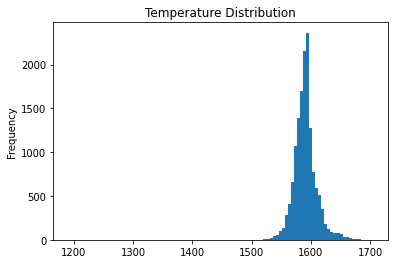

In [13]:
print(f"Кол-во наблюдений температуры ниже 1500 градусов: {df_temp.loc[df_temp['temperature'] < 1500, 'temperature'].count()}")
df_temp['temperature'].plot(kind='hist', bins=100, title='Temperature Distribution');

Можно смело отсечь температуры ниже 1500 градусов.

[867, 1214, 1619, 2052, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662

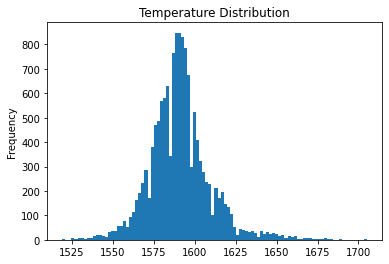

In [14]:
df_temp_anomaly_keys = list(df_temp.loc[(df_temp['temperature'] < 1500) | (df_temp['temperature']).isna(), 'key'].unique())
print(df_temp_anomaly_keys)
df_temp = df_temp.set_index('key')
df_temp = df_temp.drop(index=df_temp_anomaly_keys)
print(f"Кол-во наблюдений температуры ниже 1500 градусов: {df_temp.loc[df_temp['temperature'] < 1500, 'temperature'].count()}")
df_temp['temperature'].plot(kind='hist', bins=100, title='Temperature Distribution');

Наблюдения с отрицательной мощностью нагревания
        key           start_time             end_time  active_power  \
9780  2116  2019-07-28 02:22:08  2019-07-28 02:23:57      0.705344   

      reactive_power  
9780     -715.479924  


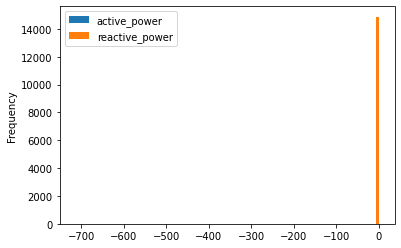

In [15]:
print(f"Наблюдения с отрицательной мощностью нагревания\n {df_arc.loc[df_arc['reactive_power'] < 0]}")
df_arc[['active_power', 'reactive_power']].plot(kind='hist', bins=100);

Как и столбцы с крайне низким показателем реактивной мощности.

Наблюдения с отрицательной мощностью нагревания
 Empty DataFrame
Columns: [key, start_time, end_time, active_power, reactive_power]
Index: []


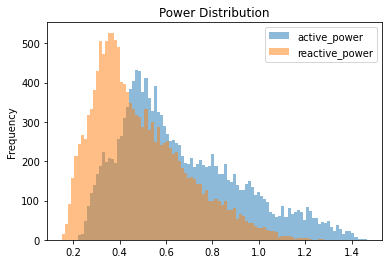

In [16]:
df_arc = df_arc[df_arc['reactive_power'] >= 0]
print(f"Наблюдения с отрицательной мощностью нагревания\n {df_arc.loc[df_arc['reactive_power'] < 0]}")
df_arc[['active_power', 'reactive_power']].plot(kind='hist', bins=100, title='Power Distribution', alpha=.5);

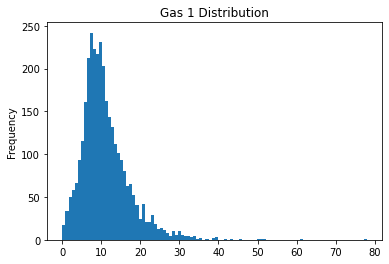

In [17]:
df_gas['gas_1'].plot(kind='hist', title='Gas 1 Distribution', bins=100);

Распределение газа и нагревания смещены вправо

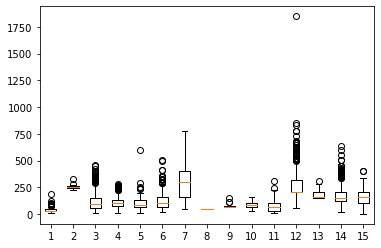

In [18]:
num_rows = len(df_bulk.columns[1:])

filtered_list = [df_bulk.iloc[:,i].dropna() for i in range(1, num_rows+1)]

plt.boxplot(filtered_list);

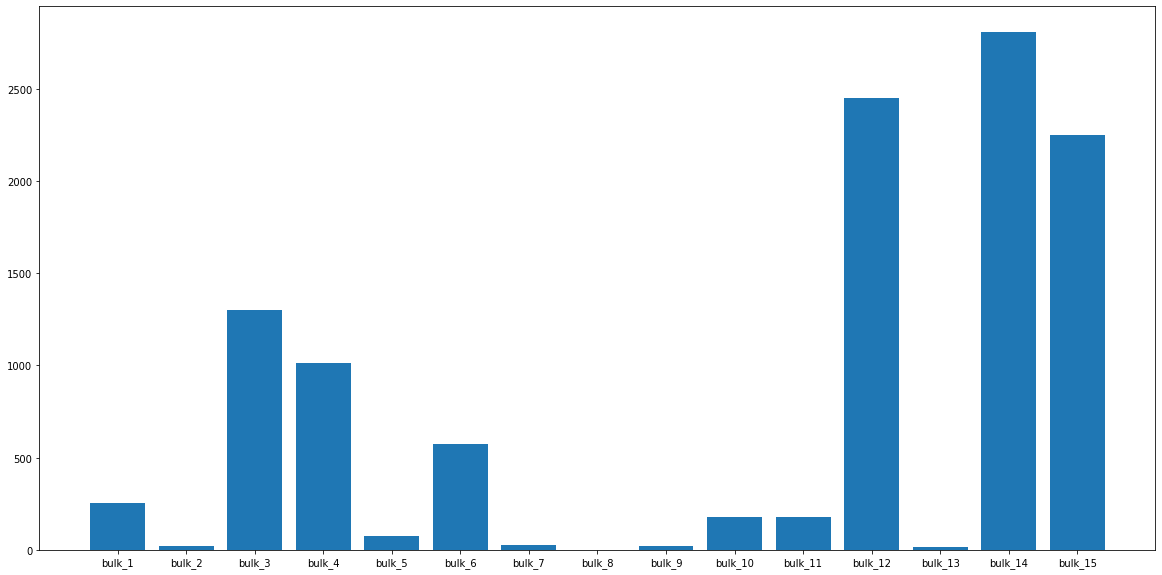

In [19]:
plt.figure(figsize=(20,10))
plt.bar(x=df_bulk.iloc[:,1:].columns, height=df_bulk.iloc[:,1:].count());

In [20]:
df_bulk.iloc[:,1:].count().sort_values(ascending=False)

bulk_14    2806
bulk_12    2450
bulk_15    2248
bulk_3     1298
bulk_4     1014
bulk_6      576
bulk_1      252
bulk_11     177
bulk_10     176
bulk_5       77
bulk_7       25
bulk_2       22
bulk_9       19
bulk_13      18
bulk_8        1
dtype: int64

Только 5 из 15 сыпучих материалов применяются в более чем 1 тыс. наблюдений, объем примесей распределен неравномерно, имеется большое число выбросов.

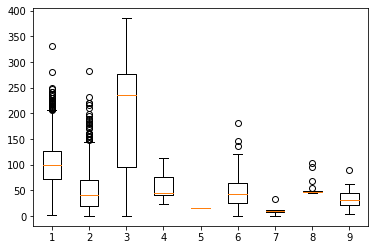

In [21]:
num_rows = len(df_wire.columns[1:])

filtered_list = [df_wire.iloc[:,i].dropna() for i in range(1, num_rows+1)]

plt.boxplot(filtered_list);

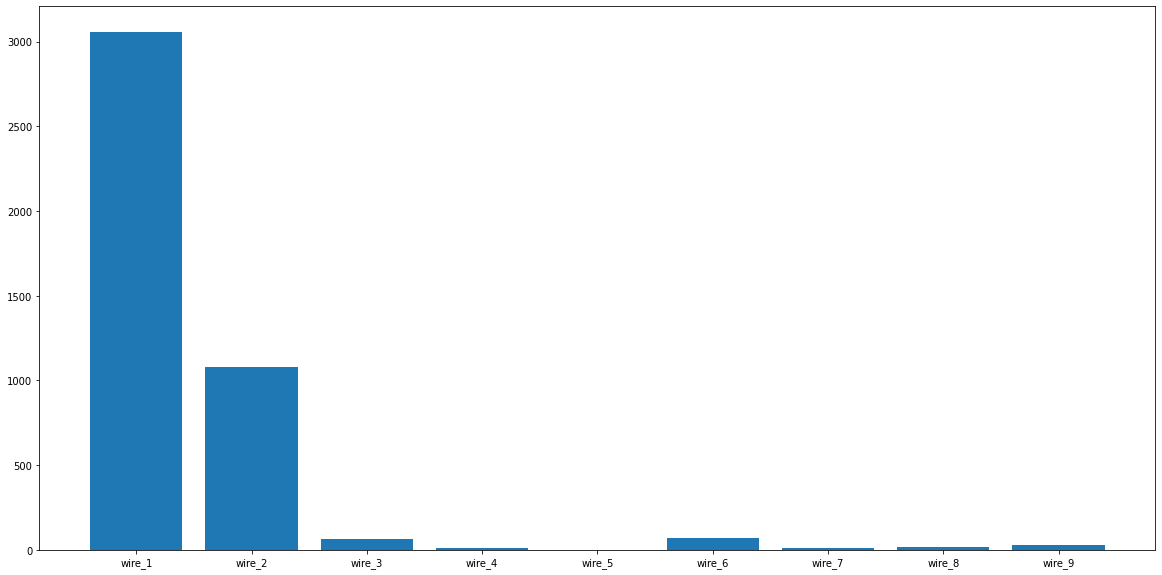

In [22]:
plt.figure(figsize=(20,10))
plt.bar(x=df_wire.iloc[:,1:].columns, height=df_wire.iloc[:,1:].count());

In [23]:
df_wire.iloc[:,1:].count().sort_values(ascending=False)

wire_1    3055
wire_2    1079
wire_6      73
wire_3      63
wire_9      29
wire_8      19
wire_4      14
wire_7      11
wire_5       1
dtype: int64

Только 2 из 9 проволочных материалов применяются в более чем 1 тыс. наблюдений, остальные материалах встречаются менее чем в ста наблюдениях.

### Преобразование временных датафреймов

In [24]:
df_bulk_time.columns

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')

In [25]:
df_bulk_time[['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15']] = pd.to_datetime(df_bulk_time[['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15']].stack(), format='%Y-%m-%d %H:%M:%S').unstack()
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [26]:
df_wire_time.columns

Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')

In [27]:
df_wire_time[['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9']] = pd.to_datetime(df_wire_time[['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9']].stack(), format='%Y-%m-%d %H:%M:%S').unstack()
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [28]:
df_arc.columns

Index(['key', 'start_time', 'end_time', 'active_power', 'reactive_power'], dtype='object')

In [29]:
df_arc[['start_time', 'end_time']] = pd.to_datetime(df_arc[['start_time', 'end_time']].stack(), format='%Y-%m-%d %H:%M:%S').unstack()
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14875 non-null  int64         
 1   start_time      14875 non-null  datetime64[ns]
 2   end_time        14875 non-null  datetime64[ns]
 3   active_power    14875 non-null  float64       
 4   reactive_power  14875 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 1.2 MB


In [30]:
df_temp.columns

Index(['measure_time', 'temperature'], dtype='object')

In [31]:
df_temp['measure_time'] = pd.to_datetime(df_temp['measure_time'])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   measure_time  13905 non-null  datetime64[ns]
 1   temperature   13905 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 325.9 KB


In [32]:
print(f"Время наблюдений нагревания металла с {df_arc['start_time'].min()} до {df_arc['end_time'].max()}")

Время наблюдений нагревания металла с 2019-05-03 11:02:14 до 2019-09-06 17:26:15


In [33]:
df_arc_day = df_arc.resample('d', on='end_time').mean()
df_arc_day = df_arc_day.drop(columns=['key'])
df_arc_day

,active_power,reactive_power
end_time,,
2019-05-03,0.640691,0.473196
2019-05-04,0.648459,0.474099
2019-05-05,0.668378,0.499113
2019-05-06,0.628859,0.456098
2019-05-07,0.644520,0.470236
...,...,...
2019-09-02,0.680941,0.506082
2019-09-03,0.690560,0.504344
2019-09-04,0.628400,0.456175


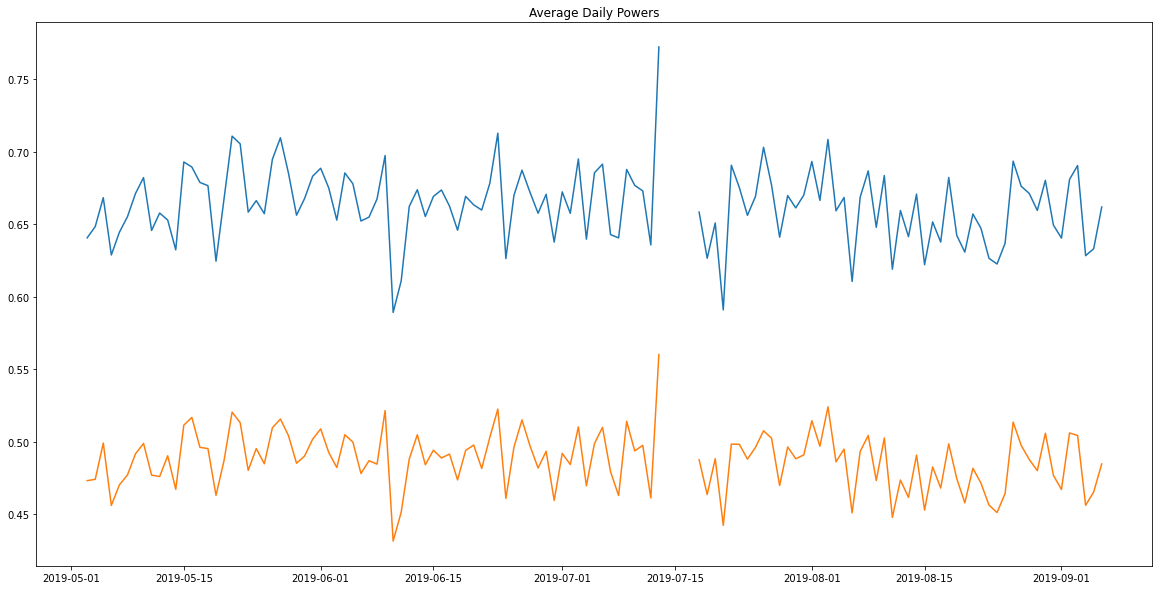

In [34]:
plt.figure(figsize=(20,10))
plt.title('Average Daily Powers')
plt.plot(df_arc_day.index, df_arc_day[['active_power', 'reactive_power']]);

In [35]:
df_arc_day.isna().sum()

active_power      4
reactive_power    4
dtype: int64

In [36]:
df_arc_day['2019-07-14':'2019-07-17']

,active_power,reactive_power
end_time,,
2019-07-14,NaN,NaN
2019-07-15,NaN,NaN
2019-07-16,NaN,NaN
2019-07-17,NaN,NaN


In [37]:
df_temp_day = df_temp.resample('d', on='measure_time').mean()
df_temp_day.head()

,temperature
measure_time,
2019-05-03,1596.979798
2019-05-04,1595.547445
2019-05-05,1605.581395
2019-05-06,1593.514286
2019-05-07,1597.260870


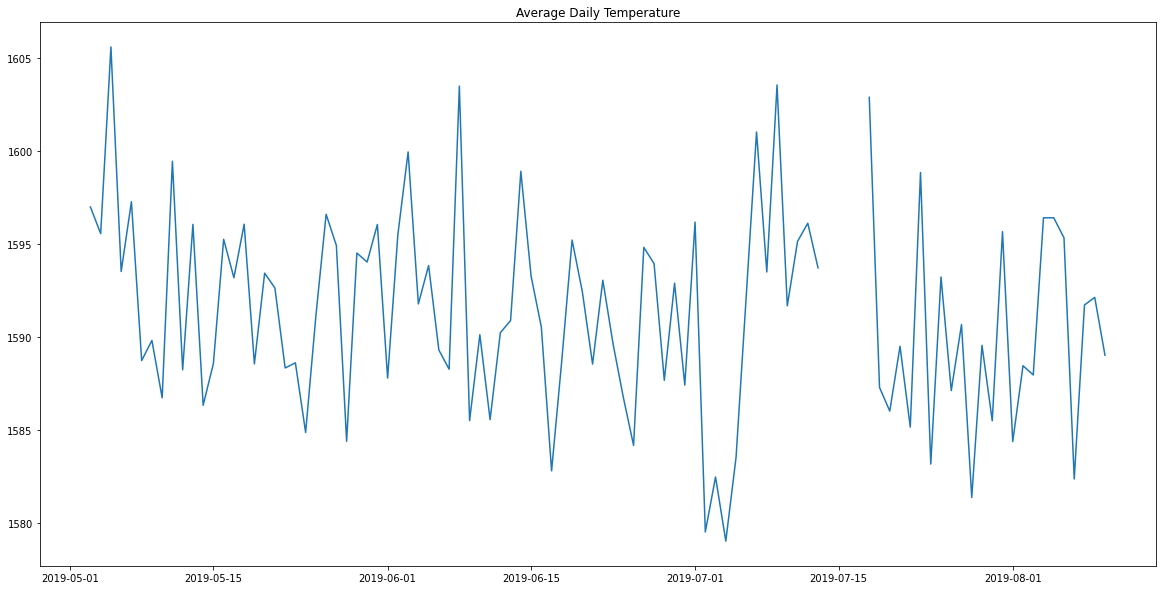

In [38]:
plt.figure(figsize=(20,10))
plt.title('Average Daily Temperature')
plt.plot(df_temp_day.index, df_temp_day['temperature']);

In [39]:
df_temp_day.isna().sum()

temperature    4
dtype: int64

In [40]:
df_temp_day['2019-07-14':'2019-07-17']

,temperature
measure_time,
2019-07-14,NaN
2019-07-15,NaN
2019-07-16,NaN
2019-07-17,NaN


In [41]:
df_temp.isna().sum()

measure_time    0
temperature     0
dtype: int64

In [42]:
df_temp = df_temp.dropna(subset=['temperature'])

In [43]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   measure_time  13905 non-null  datetime64[ns]
 1   temperature   13905 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 325.9 KB


Наблюдения содержат данные более чем за полгода с 3 мая по 6 сентября 2019 г. При этом с 14 по 17 июля наблюдений не было зафиксировано. Средние значения температур и мощности нагревания похожи на стохастичные.

## Группировка данных по нагреванию металла и температуре

In [44]:
df_arc['timedelta'] = (df_arc['end_time'] - df_arc['start_time']).dt.total_seconds()

In [45]:
df_arc_grouped = df_arc.pivot_table(index='key', 
                                    values=['active_power', 'reactive_power', 'timedelta'], 
                                    aggfunc={'active_power': ['mean', 'count'], 
                                             'reactive_power': ['mean'],
                                            'timedelta': ['sum']}).reset_index()


df_arc_grouped.columns = ['key', 'count', 'active_power_mean', 'reactive_power_mean', 'total_time']
df_arc_grouped = df_arc_grouped[df_arc_grouped['count'] != 1]
df_arc_grouped.head()

,key,count,active_power_mean,reactive_power_mean,total_time
0,1,5,0.607346,0.428564,1098.0
1,2,4,0.534852,0.363339,811.0
2,3,5,0.812728,0.587491,655.0
3,4,4,0.676622,0.514248,741.0
4,5,4,0.563238,0.421998,869.0


In [46]:
df_temp = df_temp.reset_index()
df_temp_grouped = df_temp.pivot_table(index='key', values='temperature', aggfunc=['first', 'last']).reset_index()
df_temp_grouped.columns = ['key', 'start_temperature', 'end_temperature']

In [47]:
df_temp_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2473 non-null   int64  
 1   start_temperature  2473 non-null   float64
 2   end_temperature    2473 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.1 KB


## Объединение датафреймов

In [48]:
df_full = df_bulk.merge(df_wire, on='key').merge(df_gas, on='key').merge(df_arc_grouped, on='key').merge(df_temp_grouped, on='key')
df_full = df_full.set_index('key')
df_full.head()

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,...,wire_7,wire_8,wire_9,gas_1,count,active_power_mean,reactive_power_mean,total_time,start_temperature,end_temperature
key,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.749986,5,0.607346,0.428564,1098.0,1571.0,1613.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.555561,4,0.534852,0.363339,811.0,1581.0,1602.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28.554793,5,0.812728,0.587491,655.0,1596.0,1599.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.841219,4,0.676622,0.514248,741.0,1601.0,1625.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.413692,4,0.563238,0.421998,869.0,1576.0,1602.0


In [49]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 1 to 2499
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bulk_1               199 non-null    float64
 1   bulk_2               13 non-null     float64
 2   bulk_3               950 non-null    float64
 3   bulk_4               803 non-null    float64
 4   bulk_5               53 non-null     float64
 5   bulk_6               432 non-null    float64
 6   bulk_7               13 non-null     float64
 7   bulk_8               1 non-null      float64
 8   bulk_9               13 non-null     float64
 9   bulk_10              143 non-null    float64
 10  bulk_11              128 non-null    float64
 11  bulk_12              1805 non-null   float64
 12  bulk_13              14 non-null     float64
 13  bulk_14              2059 non-null   float64
 14  bulk_15              1693 non-null   float64
 15  wire_1               2278 non-null   f

**Выводы:**
- проанализированы данные по нагреванию металла, добавлению сыпучих материалов, газу, проволочным материалам и температуре
- были удалены главные аномалии: температуры ниже 1500 градусов и сильно отрицательные значения реактивной мощности
- проанализированы распределения потенциальных признаков, отмечены дисбалансы
- произведен ресемпл значений температуры и нагревания, судя по графикам, данные стохастичные
- произведено объединение датафреймов, осталось чуть больше 3 тыс. наблюдений



**План исследования:**
1. отделение целевого признака `end_temperature` от остальных признаков
2. замена NA-значений заглушками (0)
3. разделение на тренировочную и тестовую выборки
4. стандартизация признаков
5. Подбор лучшей ML-модели, ключевая метрика - MAE. Предлагается рассмотреть несколько вариантов дерева решений и catboost
6. Выбор лучшей модели с помощью кросс-валидации
7. Тестирование лучшей модели
8. Отчет о проведенном исследовании

## Работа с пропусками

In [50]:
df_full = df_full.fillna(0)
df_full.head()

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,...,wire_7,wire_8,wire_9,gas_1,count,active_power_mean,reactive_power_mean,total_time,start_temperature,end_temperature
key,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.749986,5,0.607346,0.428564,1098.0,1571.0,1613.0
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.555561,4,0.534852,0.363339,811.0,1581.0,1602.0
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.554793,5,0.812728,0.587491,655.0,1596.0,1599.0
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.841219,4,0.676622,0.514248,741.0,1601.0,1625.0
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.413692,4,0.563238,0.421998,869.0,1576.0,1602.0


## Генерация дополнительных признаков

In [51]:
df_full.columns

Index(['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7',
       'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13',
       'bulk_14', 'bulk_15', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5',
       'wire_6', 'wire_7', 'wire_8', 'wire_9', 'gas_1', 'count',
       'active_power_mean', 'reactive_power_mean', 'total_time',
       'start_temperature', 'end_temperature'],
      dtype='object')

In [52]:
#общий объем рассыпчатых материалов
df_full['total_bulk'] = df_full[['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 
                                 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 
                                 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15']].sum(axis=1)
#общий объем проволочных материалов
df_full['total_wire'] = df_full[['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5',
                                 'wire_6', 'wire_7', 'wire_8', 'wire_9']].sum(axis=1)
#полная мощность
df_full['energy'] = np.sqrt(df_full['reactive_power_mean']**2 + df_full['active_power_mean']**2) * df_full['total_time']



#отношение объема газа к числу нагреваний
df_full['gas_1_count_ratio'] = df_full['gas_1'] / df_full['count']

In [53]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 1 to 2499
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bulk_1               2300 non-null   float64
 1   bulk_2               2300 non-null   float64
 2   bulk_3               2300 non-null   float64
 3   bulk_4               2300 non-null   float64
 4   bulk_5               2300 non-null   float64
 5   bulk_6               2300 non-null   float64
 6   bulk_7               2300 non-null   float64
 7   bulk_8               2300 non-null   float64
 8   bulk_9               2300 non-null   float64
 9   bulk_10              2300 non-null   float64
 10  bulk_11              2300 non-null   float64
 11  bulk_12              2300 non-null   float64
 12  bulk_13              2300 non-null   float64
 13  bulk_14              2300 non-null   float64
 14  bulk_15              2300 non-null   float64
 15  wire_1               2300 non-null   f

In [54]:
pd.set_option('display.max_columns', None)
df_full.head()

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas_1,count,active_power_mean,reactive_power_mean,total_time,start_temperature,end_temperature,total_bulk,total_wire,energy,gas_1_count_ratio
key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986,5,0.607346,0.428564,1098.0,1571.0,1613.0,553.0,60.059998,816.174086,5.949997
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561,4,0.534852,0.363339,811.0,1581.0,1602.0,582.0,96.052315,524.386650,3.138890
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793,5,0.812728,0.587491,655.0,1596.0,1599.0,544.0,91.160157,656.855369,5.710959
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219,4,0.676622,0.514248,741.0,1601.0,1625.0,595.0,89.063515,629.749161,4.710305
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692,4,0.563238,0.421998,869.0,1576.0,1602.0,584.0,98.352796,611.592410,1.353423


In [55]:
#деление на выборки
STATE = 26923

features = df_full.drop(columns=['end_temperature'])
target = df_full['end_temperature']

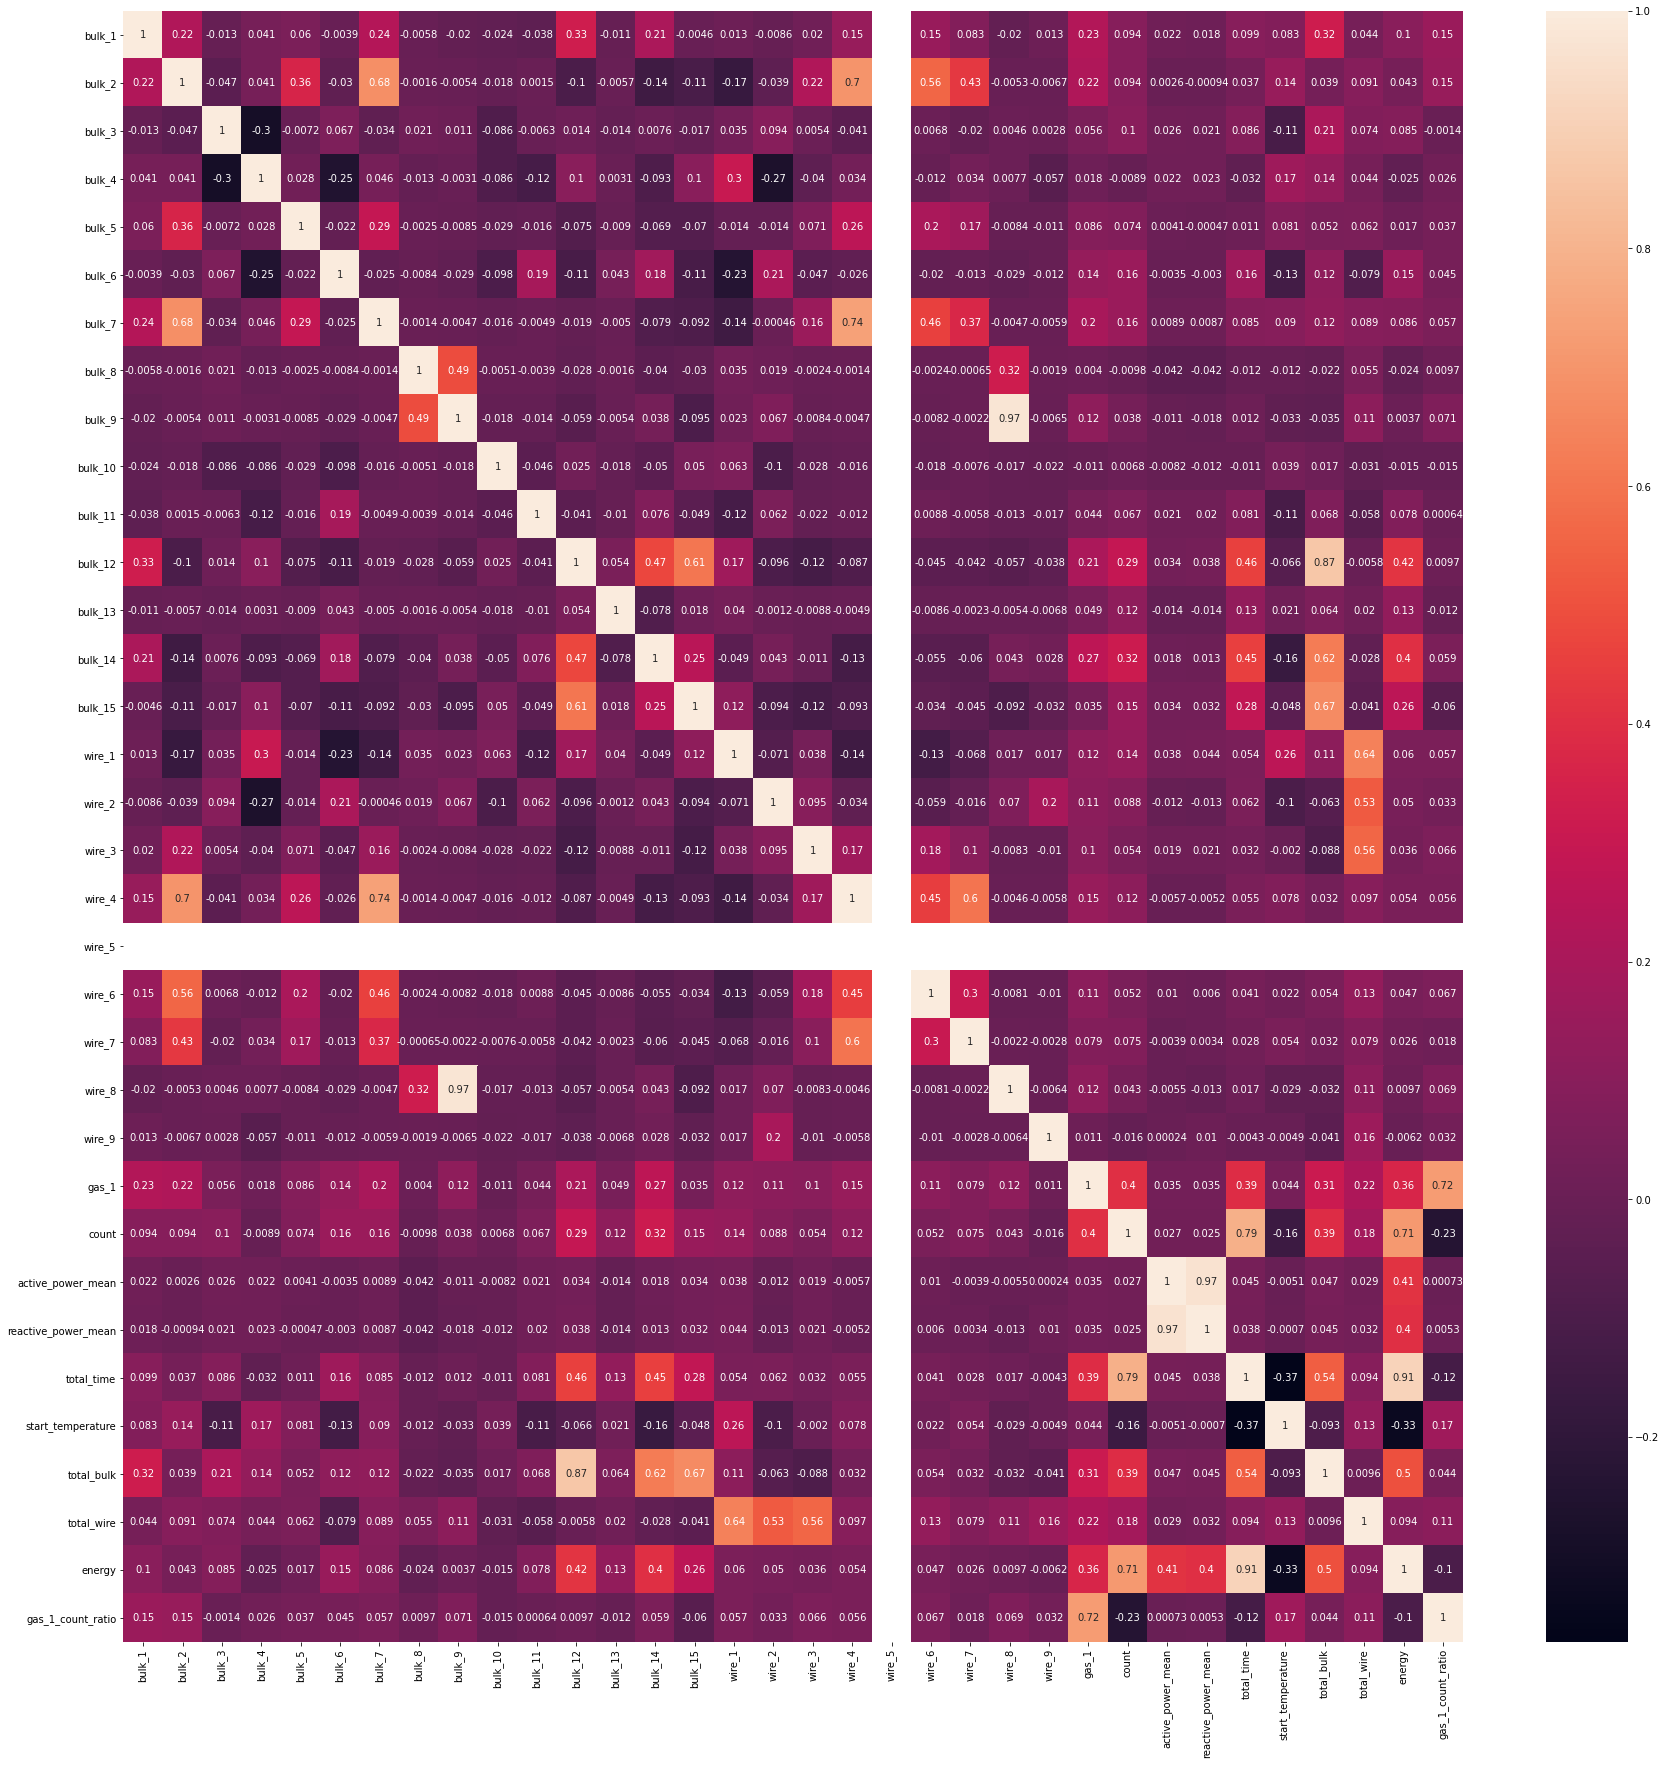

In [56]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(features.corr(), annot=True)
plt.show()

Удалим признаки с корреляциями 0.7 и более и признаки без корреляций:
- `bulk_12`
- `count`
- `gas_1`
- `wire_8`
- `wire_5`
- `bulk_7` 
- `bulk_2`
- `active_power_mean`
- `reactive_power_mean`
- `total_time`

In [57]:
#удаление лишних признаков
features = features.drop(columns=['bulk_12', 'count', 'gas_1', 'wire_8', 'bulk_7', 'bulk_2', 'active_power_mean', 
                                  'reactive_power_mean', 'total_time', 'wire_5'])
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 1 to 2499
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bulk_1             2300 non-null   float64
 1   bulk_3             2300 non-null   float64
 2   bulk_4             2300 non-null   float64
 3   bulk_5             2300 non-null   float64
 4   bulk_6             2300 non-null   float64
 5   bulk_8             2300 non-null   float64
 6   bulk_9             2300 non-null   float64
 7   bulk_10            2300 non-null   float64
 8   bulk_11            2300 non-null   float64
 9   bulk_13            2300 non-null   float64
 10  bulk_14            2300 non-null   float64
 11  bulk_15            2300 non-null   float64
 12  wire_1             2300 non-null   float64
 13  wire_2             2300 non-null   float64
 14  wire_3             2300 non-null   float64
 15  wire_4             2300 non-null   float64
 16  wire_6             2300 

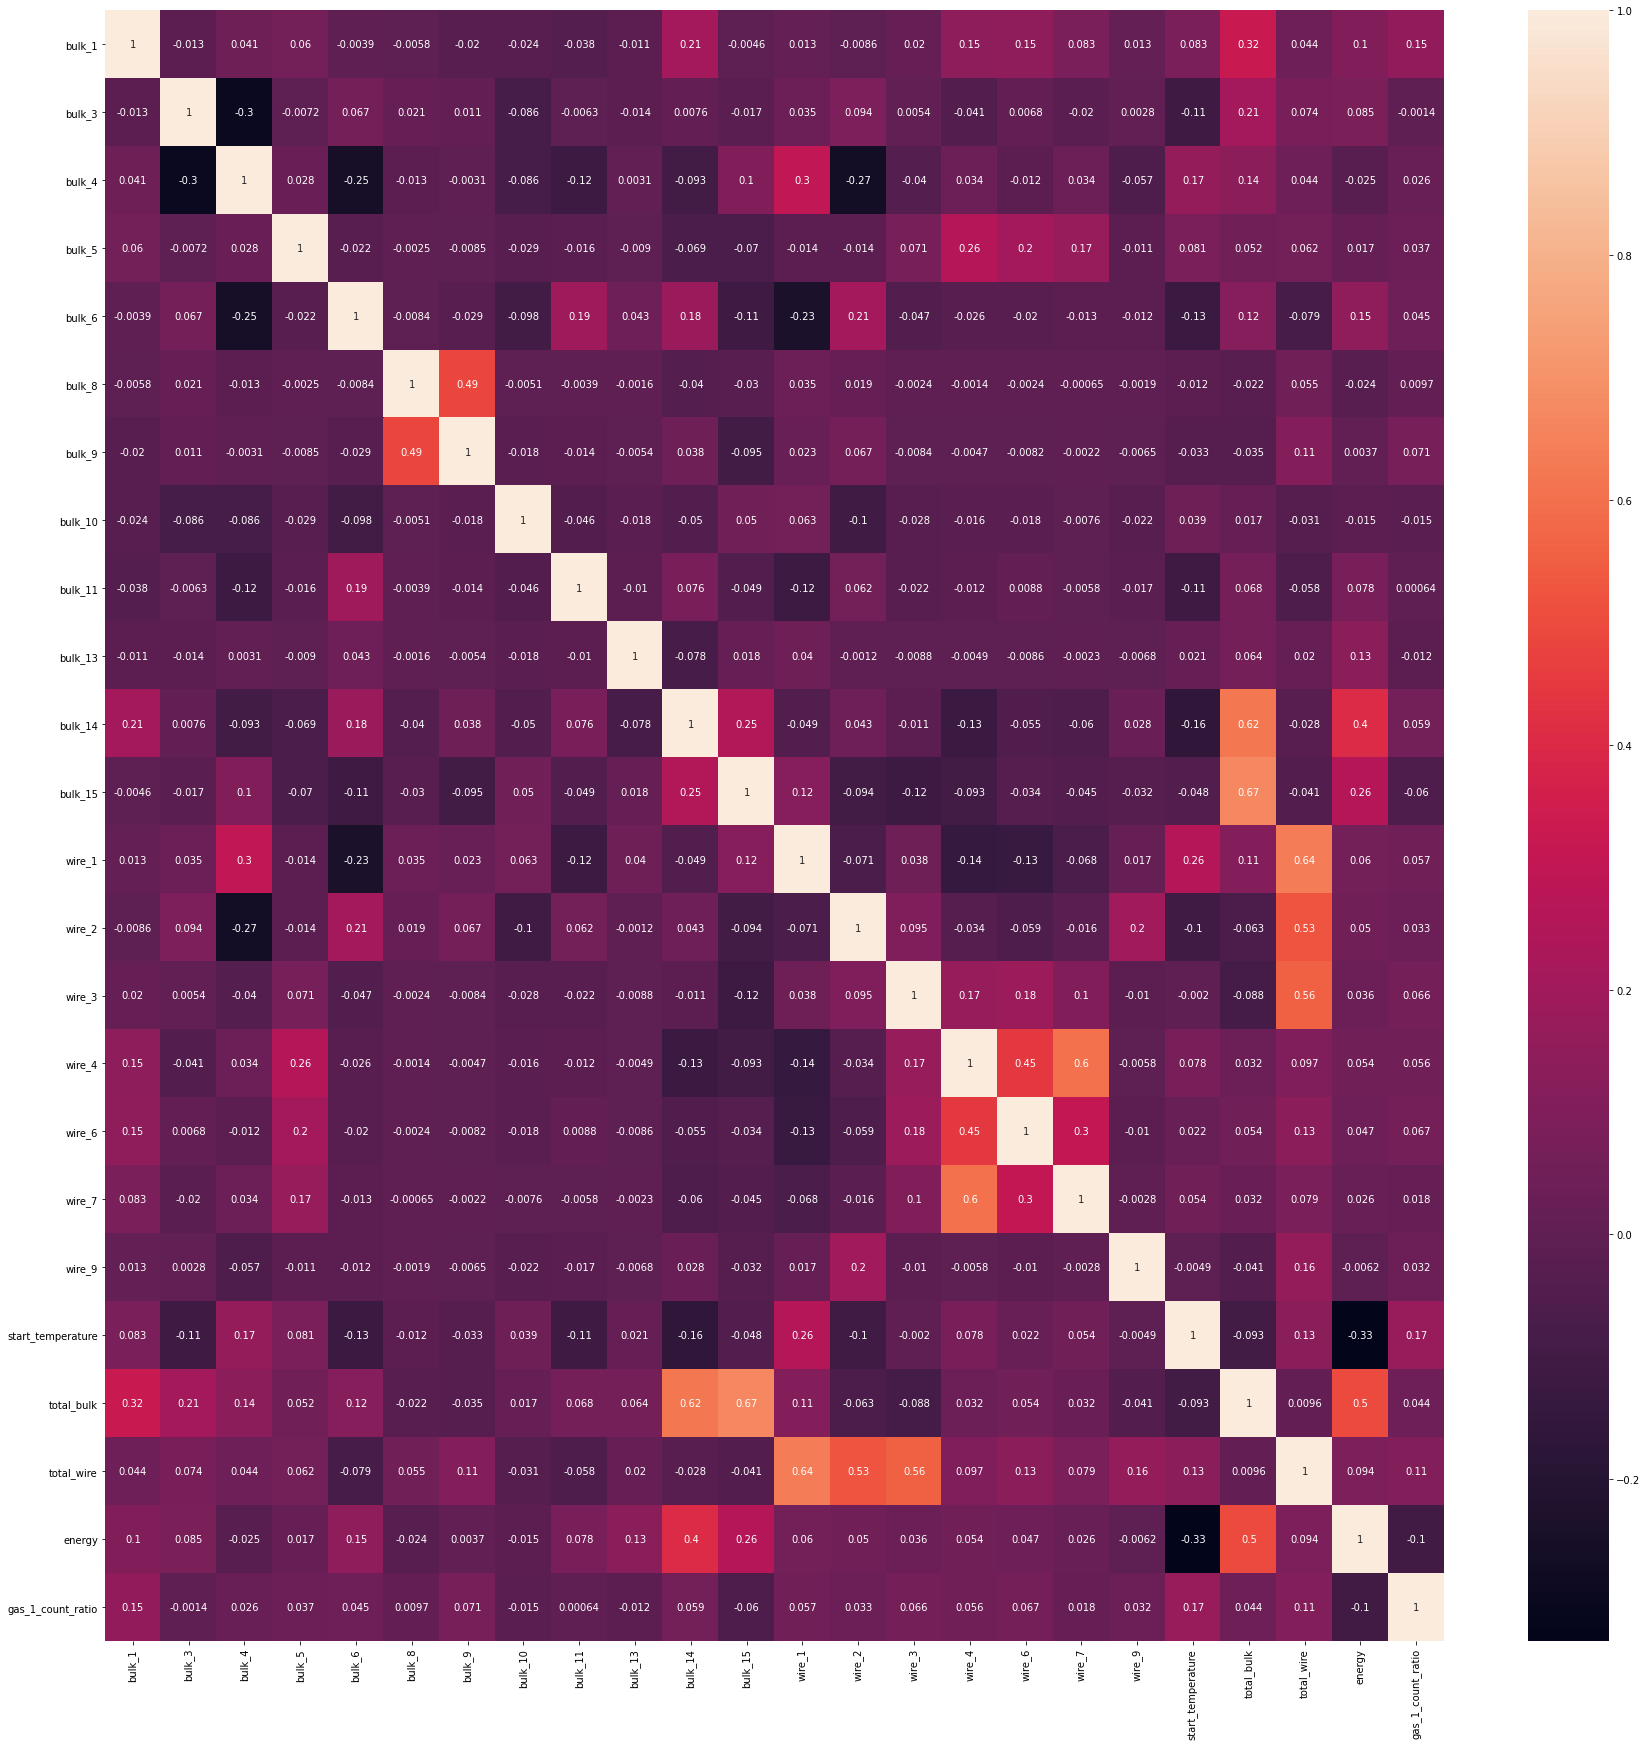

In [58]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(features.corr(), annot=True)
plt.show()

In [59]:
#деление на выборки
train_features, test_features, train_target, test_target = train_test_split(features, target, random_state=STATE, test_size=.25)
train_features.shape, test_features.shape, train_target.shape, test_target.shape

((1725, 24), (575, 24), (1725,), (575,))

In [60]:
#стандартизация признаков
scaler = StandardScaler()
train_features_sim = scaler.fit_transform(train_features)
test_features_sim = scaler.transform(test_features)

**Выводы:** в результате генерации признаков сформировано 24 признака

## Обучение моделей

In [61]:
model_dict = {'model': [], 'best_score': []}

### Дерево решений

In [62]:
%%time
#дерево решений
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1, 11, 2),
    'min_samples_leaf': range(1, 11, 2),
    'criterion': ['mae', 'mse']
}

dtr = DecisionTreeRegressor(random_state=STATE)

grid_dtr = GridSearchCV(dtr, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1)
grid_dtr.fit(train_features_sim, train_target)

grid_dtr.best_estimator_

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: user 19.7 s, sys: 28.1 ms, total: 19.7 s
Wall time: 19.9 s


DecisionTreeRegressor(criterion='mae', max_depth=7, min_samples_leaf=9,
                      random_state=26923)

In [63]:
model_dict['model'].append('DecisionTreeRegressor')
model_dict['best_score'].append(-grid_dtr.best_score_)
print(f'MAE дерева решений (лучшая модель): {-grid_dtr.best_score_}')

MAE дерева решений (лучшая модель): 7.272173913043479


### Случайный лес

In [64]:
%%time
param_grid = {'n_estimators': [100, 300, 500],
              'criterion': ['mae', 'mse'], 
              'max_depth': range(1,10,2)}

rfr = RandomForestRegressor(random_state=STATE)

grid_rfr = GridSearchCV(rfr, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=2)
grid_rfr.fit(train_features_sim, train_target)

grid_rfr.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......criterion=mae, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END .......criterion=mae, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END .......criterion=mae, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END .......criterion=mae, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END .......criterion=mae, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END .......criterion=mae, max_depth=1, n_estimators=300; total time=   5.7s
[CV] END .......criterion=mae, max_depth=1, n_estimators=300; total time=   6.0s
[CV] END .......criterion=mae, max_depth=1, n_estimators=300; total time=   6.0s
[CV] END .......criterion=mae, max_depth=1, n_estimators=300; total time=   6.2s
[CV] END .......criterion=mae, max_depth=1, n_estimators=300; total time=   6.0s
[CV] END .......criterion=mae, max_depth=1, n_estimators=500; total time=  10.0s
[CV] END .......criterion=mae, max_depth=1, n_e

RandomForestRegressor(max_depth=9, n_estimators=500, random_state=26923)

In [65]:
model_dict['model'].append('RandomForestRegressor')
model_dict['best_score'].append(-grid_rfr.best_score_)
print(f'MAE случайного леса (лучшая модель): {-grid_rfr.best_score_}')

MAE случайного леса (лучшая модель): 6.581361625855713


### CatBoostRegressor

In [66]:
%%time
params = {
    'loss_function': ['MAE', 'RMSE'],
    'iterations': [1000, 5000],
    'learning_rate': [0.01, 0.001]
}

cbr = CatBoostRegressor(random_state=STATE, verbose=500, early_stopping_rounds=5)

grid_cbr = GridSearchCV(cbr, param_grid=params, scoring='neg_mean_absolute_error', verbose=3)
grid_cbr.fit(train_features, train_target)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 8.0980787	total: 54.4ms	remaining: 54.3s
500:	learn: 5.3939587	total: 1.78s	remaining: 1.78s
999:	learn: 4.6330176	total: 3.56s	remaining: 0us
[CV 1/5] END iterations=1000, learning_rate=0.01, loss_function=MAE; total time=   6.2s
0:	learn: 8.0818034	total: 4.19ms	remaining: 4.19s
500:	learn: 5.4450811	total: 1.83s	remaining: 1.82s
999:	learn: 4.6995696	total: 3.43s	remaining: 0us
[CV 2/5] END iterations=1000, learning_rate=0.01, loss_function=MAE; total time=   5.2s
0:	learn: 8.1396222	total: 3.34ms	remaining: 3.34s
500:	learn: 5.4023824	total: 1.57s	remaining: 1.56s
999:	learn: 4.6974835	total: 3.15s	remaining: 0us
[CV 3/5] END iterations=1000, learning_rate=0.01, loss_function=MAE; total time=   4.8s
0:	learn: 8.1983179	total: 3.32ms	remaining: 3.32s
500:	learn: 5.4213674	total: 1.62s	remaining: 1.62s
999:	learn: 4.7005415	total: 3.24s	remaining: 0us
[CV 4/5] END iterations=1000, learning_rate=0.01, loss_function=

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7fd7cae787f0>,
             param_grid={'iterations': [1000, 5000],
                         'learning_rate': [0.01, 0.001],
                         'loss_function': ['MAE', 'RMSE']},
             scoring='neg_mean_absolute_error', verbose=3)

In [67]:
model_dict['model'].append('CatBoostRegressor')
model_dict['best_score'].append(-grid_cbr.best_score_)
print(f'MAE градиентного бустинга (лучшая модель): {-grid_cbr.best_score_}')

MAE градиентного бустинга (лучшая модель): 6.440016959852978


In [68]:
model_scores = pd.DataFrame(model_dict)
model_scores

,model,best_score
0,DecisionTreeRegressor,7.272174
1,RandomForestRegressor,6.581362
2,CatBoostRegressor,6.440017


**Вывод:** лучше всего себя показала модель градиентного бустинга.

## Тестирование лучшей модели

In [69]:
model = grid_cbr
pred = model.predict(test_features)
print(f'Значение MAE лучшей модели: {mean_absolute_error(test_target, pred)}')

Значение MAE лучшей модели: 6.135959422348639


In [71]:
print(f'Параметры лучшей модели: {model.best_params_}')

Параметры лучшей модели: {'iterations': 5000, 'learning_rate': 0.01, 'loss_function': 'MAE'}


**Вывод:** на тестовых данных метрика достигла хорошего показателя

**Общие выводы:**
- проанализированы данные по нагреванию металла, добавлению сыпучих материалов, газу, проволочным материалам и температуре
- были удалены главные аномалии: температуры ниже 1500 градусов (в т.ч. пропуски) и сильно отрицательные значения реактивной мощности
- проанализированы распределения потенциальных признаков, отмечены дисбалансы
- после объединения датафреймов осталось 2,3 тыс. наблюдений
- значения NA были заменены на 0
- данные разделены на тренировочную и тестовую выборки в соотношении 75% на 25%, произведена стандартизация признаков
- на кросс-валидации лучший результат дал градиентный бустинг CatBoost, значение MAE - 6.44
- на тестовой выборке модель показала значение MAE 6.14, что является хорошим показателем